In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV,KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


##**1. Data Loading and Preprocessing**

**● Loading the Dataset:**


---


####Loaded the california housing dataset(Fetch_california_housing) from sklearn library which is an inbuilt dataset provided by sklearn for Machine Learning practice. It contains the features describing California districts (e.g., median income, average rooms, population) and the target value (median house value).

In [2]:
housing = fetch_california_housing() #load data from california housing
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

####Since the loaded dataset is in dictionary format, we need to convert them into Pandas DataFrame format to make it easier for viewing and perform preprocessing techniques. Then add the target column 'MedHouseVal' to the DataFrame to make the features and target together.

In [3]:
# convert the dataset into dataframe
df=pd.DataFrame(housing.data,columns=housing.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [4]:
df['MedHouseVal']=housing.target # adding target column to the dataframe
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


##**● Preprocessing & EDA:**


**Data Cleaning**
---
####1. Display the overall informations about the dataset such as shape,columns etc and statistical measurements using describe() method. This will help us to identify whether the dataset loaded correctly and an overall idea about the columns.The method describe() provides a quick numerical summary of the dataset.

####2. Checking for the duplicate value using isna() method. If there is larger amount of missing data , it can cause dataset bias which lead to low performance. Here there is no missing datas found.

####3. Next step will be the handling of outliers. Here I used the Inter Quartile Range(IQR) method to check and manage outliers. Outliers will affect the model perfoemance and lead to bias. Capping keeps the data within reasonable limits without losing valuable samples.

####4. After that i analyse the distribution and correlation amoung the features. Here I use histogram and heatmap for represent the distributrion. Histogram shows how each variable spread and its skeweness while the heatmap shows how the features in the dataset are related to each other.

In [5]:
# Shape of dataset
print(f"\n Dataset Shape: {df.shape}")



 Dataset Shape: (20640, 9)


In [6]:
# Basic Information
print("\n Dataset Info:\n")
print(df.info())


 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [7]:
# Statistical summary
print("\n Statistical Summary:\n")
display(df.describe())


 Statistical Summary:



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
# Check for missing values
print("\n Missing Values:\n")
print(df.isnull().sum())


 Missing Values:

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [9]:
#Check for duplicate

duplicate_rows=df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [10]:
# Column names
print("\n Columns:\n")
print(df.columns.tolist())


 Columns:

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']


In [11]:
# Finding outliers and handle it
num_cols=df.select_dtypes(include=['int64','float64']).columns

# find the Q1, Q2, Q3 and IQR for numerical columns
Q1=df[num_cols].quantile(0.25)
Q2=df[num_cols].quantile(0.50)
Q3=df[num_cols].quantile(0.75)
IQR=Q3-Q1

outlier_counts = {}
for col in num_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)



# Convert dictionary to DataFrame
outlier_summary = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])


# Display table
outlier_summary

,Feature,Outlier Count
0,MedInc,681
1,HouseAge,0
2,AveRooms,511
3,AveBedrms,1424
4,Population,1196
5,AveOccup,711
6,Latitude,0
7,Longitude,0
8,MedHouseVal,1071


In [12]:
df_clipped = df.copy()
outlier_aftercapping_counts = {}
for col in num_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    df_clipped[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    outliers_clipped = df_clipped[(df_clipped[col] < lower_bound) | (df_clipped[col] > upper_bound)]
    outlier_aftercapping_counts[col] = len(outliers_clipped)


# Convert dictionary to DataFrame
outlier_aftercapping_summary = pd.DataFrame(list(outlier_aftercapping_counts.items()), columns=['Feature', 'Outlier Count'])


# Display table
outlier_aftercapping_summary

,Feature,Outlier Count
0,MedInc,0
1,HouseAge,0
2,AveRooms,0
3,AveBedrms,0
4,Population,0
5,AveOccup,0
6,Latitude,0
7,Longitude,0
8,MedHouseVal,0


<Figure size 1000x600 with 0 Axes>

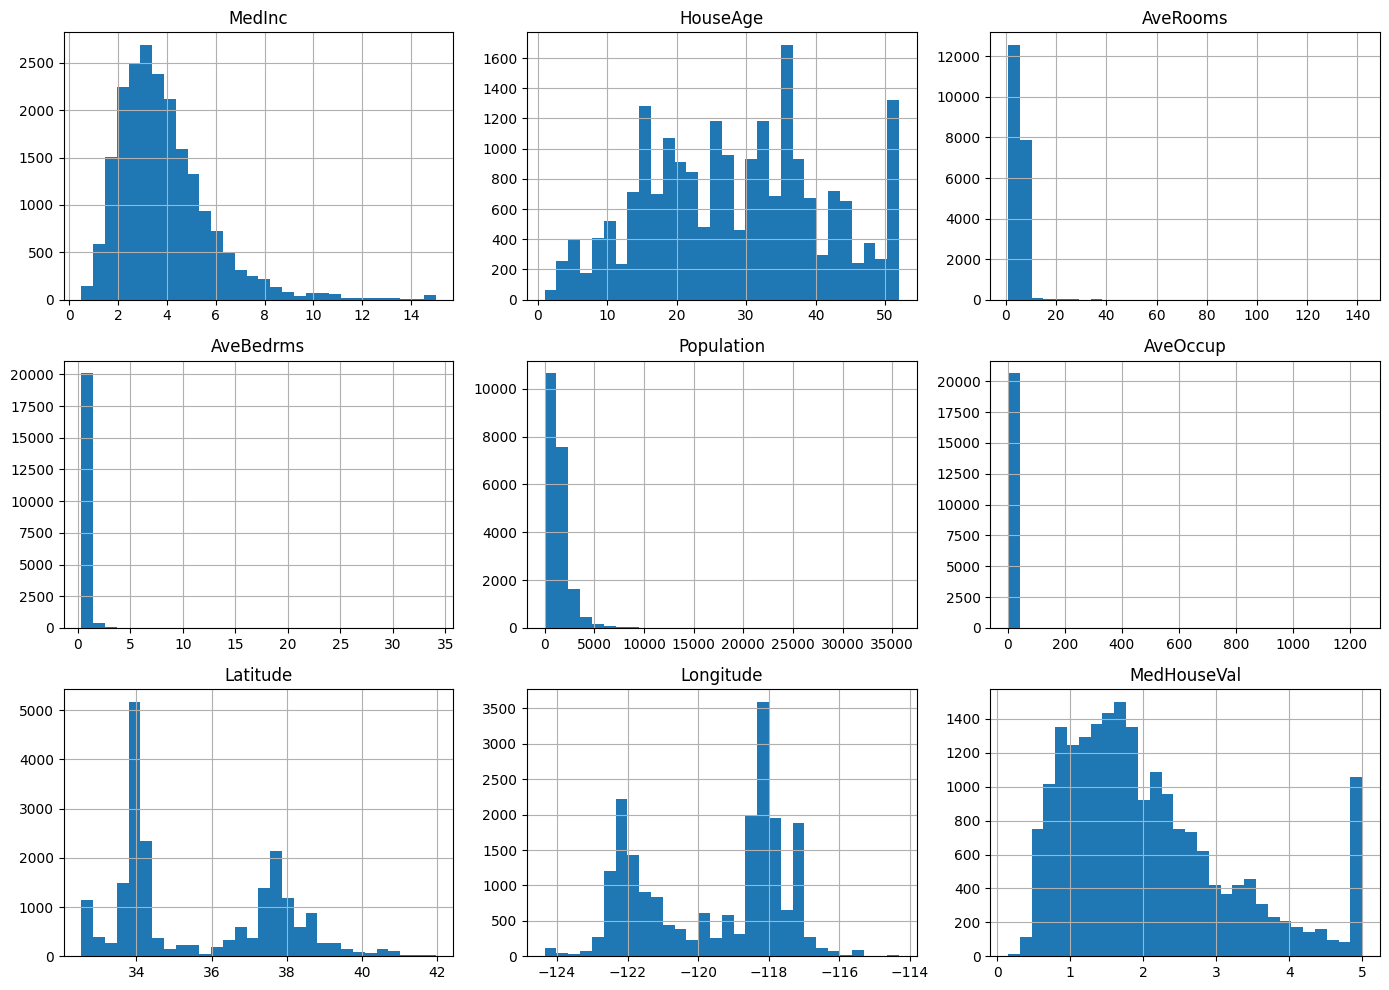

In [13]:
# EDA: distributions and correlations
plt.figure(figsize=(10,6))
df.hist(bins=30, figsize=(14,10))
plt.tight_layout()
plt.show()



**1. Distribution of Features (Histograms)**

The histograms show the **spread and skewness** of each variable in the dataset.

- **Median Income (MedInc)** is right-skewed — most people have low to moderate income, with fewer high-income groups.  

- **House Age (HouseAge)** shows concentration around 20–30 years, indicating many mid-aged houses.

- **Average Rooms (AveRooms)** and **Average Bedrooms (AveBedrms)** have long right tails — a few houses have very large averages, suggesting **outliers**.

- **Population** and **AveOccup** (average occupancy) show skewness — some areas are highly populated.

- **Latitude** and **Longitude** distributions show the **geographic spread** of the dataset across California.


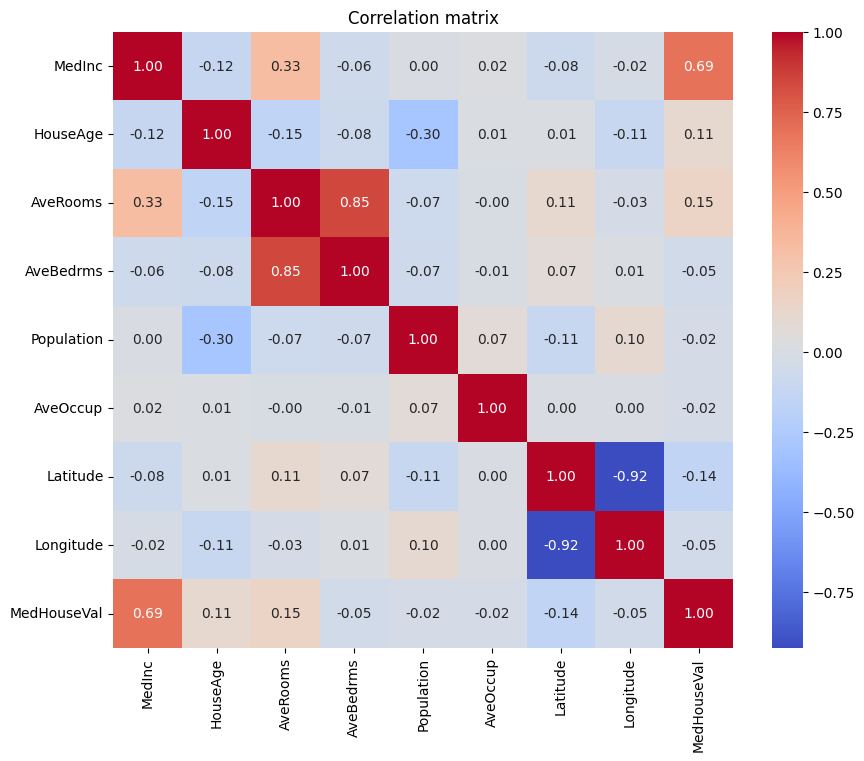

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


**2. Correlation Heatmap**

The heatmap shows how the features in the dataset are related to each other. Median Income (MedInc) has a strong positive correlation (around 0.69) with Median House Value (MedHouseValue), meaning that areas with higher income tend to have higher house prices. Average Rooms (AveRooms) also has a moderate positive link with house value, but it is related to Average Bedrooms (AveBedrms), so they may overlap in information. Latitude and Longitude have negative correlations with house prices, suggesting that houses in certain locations, like near the coast, are more expensive. Other features such as Population and Average Occupancy (AveOccup) show weak correlations and have less effect on house prices.


---



##**Data Transformation**


---



Next we need to perform data tranformation to convert the data into a suitable format for machine learning algorithms. In transformation categorical values and numerical values are treated separately.
Encoding is used for categorical data.It convert categorical data to numerical values. So here first check if categorical data is available, here it is zero. So no need to encode
Scaling is applied on numerical features inorder to make them in a unique format.Scaling brings all features to a similar scale, improving model stability. Here I performed standardscalar for scaling.

In [15]:
#checking for categorical value to check whether encoding is needed. There is no need for encoding as there is no categorical values
cat_cols=df_clipped.select_dtypes(include=['object']).columns
print(cat_cols)

# Numerical columns
num_cols=df_clipped.select_dtypes(include=['int64','float64']).columns
print(num_cols)

Index([], dtype='object')
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')


In [16]:
#Performing feature scaling for numerical values

scaler=StandardScaler()
scaled_features = scaler.fit_transform(df_clipped[num_cols])

scaled_df=pd.DataFrame(scaled_features,columns=num_cols)
scaled_df['MedHouseVal']=df['MedHouseVal']
print("\nScaled DataFrame:\n")
scaled_df.head()


Scaled DataFrame:



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.541006,0.982143,1.347665,-0.424488,-1.325821,-0.497871,1.052548,-1.327835,4.526
1,2.541006,-0.607019,0.749027,-1.070004,1.389936,-1.142781,1.043185,-1.322844,3.585
2,2.085156,1.856182,2.394098,0.192534,-1.098528,-0.140910,1.038503,-1.332827,3.521
3,1.111288,1.856182,0.411358,0.187723,-1.017539,-0.508882,1.038503,-1.337818,3.413
4,0.027262,1.856182,0.784108,0.287439,-1.008395,-1.039145,1.038503,-1.337818,3.422


##**2. Regression Algorithm Implementation**

Implement the following regression algorithms:
● Linear Regression
● Decision Tree Regressor
● Random Forest Regressor

In [17]:
#Define X and Y from the scaled dataset
x = scaled_df.drop('MedHouseVal', axis=1)
y = scaled_df['MedHouseVal']
results = {}
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

#Split the data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'mse': mse,
        'mae': mae,
        'r2': r2,
        'predictions': y_pred
    }

    print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

MSE: 0.4638, MAE: 0.5041, R²: 0.6460
MSE: 0.5011, MAE: 0.4581, R²: 0.6176
MSE: 0.2569, MAE: 0.3306, R²: 0.8040


####**Linear Regression**

---



Linear Regression is the relationship between one dependent variable (target) and one or more independent variables (features) by fitting a straight line. It uses the least squares method to minimize the difference between the actual and predicted values.

The California housing dataset has numeric features like income, number of rooms, and population, so Linear Regression can be used.It works well as a basic model to see how the features relate to house prices.

####**Decision Tree**

---



Decision Tree is a Supervised Machine Learning algorithm used for both classification and prediction tasks.It splits data into smaller subsets based on feature thresholds, forming a hierachial structure. Each split tries to make the target values in each group as similar as possible. At the end, each leaf of the tree predicts the outcome forthat feature.

It is suitable for The California Housing dataset because it captures nonlinear relationships between features (like location, income, and rooms).It is also easy to understand, as you can see how the data is split at each step to make predictions.

####**Random Forest**

---



Random Forest is an ensemble model that builds many Decision Trees on different random subsets of the data and features, then averages their predictions to reduce overfitting and improve accuracy.

It works well on datasets with different types of features. It can handle nonlinear relationships and interactions between features, and usually gives accurate predictions on structured data like California Housing Dataset.

##**3. Model Evaluation and Comparison**

● Evaluate the performance of each algorithm using:

○ Mean Squared Error (MSE)
○ Mean Absolute Error (MAE)
○ R-squared Score (R2)

● Compare the results:

○ Identify the best-performing algorithm with proper justification.
○ Identify the worst-performing algorithm and explain the reasoning.

####**Linear Regression:**
The Linear Regression model has an MSE of 0.4638, an MAE of 0.5041, and an R2 score of 0.6460. This means the model can explain about 65% of the variation in house prices. The errors are moderate, so the predictions are fairly accurate. However, since Linear Regression only captures linear relationships, it cannot learn more complex patterns in the data, which limits its overall performance.

####**Decision Tree Regressor:**
The Decision Tree Regressor has an MSE of 0.5011, an MAE of 0.4581, and an R2 score of 0.6176. Its error is slightly higher and its R² is lower than Linear Regression, showing that it performs worse overall. Although it can capture nonlinear patterns, the Decision Tree tends to overfit the training data, which reduces its accuracy on new, unseen data. Because of this, it is considered the worst-performing model among the three.

####**Random Forest Regressor:**
The Random Forest Regressor achieves an MSE of 0.2569, an MAE of 0.3306, and an R2 score of 0.8039. This means it explains more than 80% of the variation in house prices, which is much higher than the other models. It has the lowest error values, showing that its predictions are the most accurate. Since Random Forest combines multiple decision trees, it avoids overfitting and captures complex relationships effectively. Therefore, it is the best-performing model among the three.

##**4. Cross-Validation and Hyperparameter Tuning**

● Perform k-fold cross-validation (k=5 or 10) for all models to ensure robust performance evaluation.

● Use appropriate techniques (e.g., GridSearchCV or RandomizedSearchCV) to fine-tune the hyperparameters of each model.

● Document the hyperparameters tuned and explain their impact on model performance.

In [20]:
print("5-Fold Cross-Validation Results:")
cv_results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=kf, scoring='r2')
    print(f"{name} CV R² Scores: {cv_scores}")
    print(f"{name} Mean CV R²: {cv_scores.mean():.4f}\n")


5-Fold Cross-Validation Results:
Linear Regression CV R² Scores: [0.64603662 0.674421   0.67052076 0.69066211 0.64853517]
Linear Regression Mean CV R²: 0.6660

Decision Tree CV R² Scores: [0.61757247 0.61047602 0.60353172 0.62282136 0.60687072]
Decision Tree Mean CV R²: 0.6123

Random Forest CV R² Scores: [0.8052539  0.81101348 0.80192216 0.81979886 0.80475405]
Random Forest Mean CV R²: 0.8085



In [25]:
print("\n=== HYPERPARAMETER TUNING USING GRIDSEARCHCV ===")
dt_params = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_grid = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=dt_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
dt_grid.fit(x, y)

print("Best Decision Tree Parameters:", dt_grid.best_params_)
print("Best Decision Tree CV R²:", dt_grid.best_score_, "\n")

rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
rf_grid.fit(x, y)

print("Best Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest CV R²:", rf_grid.best_score_, "\n")


=== HYPERPARAMETER TUNING USING GRIDSEARCHCV ===
Best Decision Tree Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Decision Tree CV R²: 0.522629444758218 

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}
Best Random Forest CV R²: 0.6519849373793164 



###**1. K-Fold Cross Validation Results**

K-Fold Cross Validation evaluates how each model performs on different subsets of the dataset.
It gives a more reliable estimate than using a single train–test split.

**Linear Regression (Mean R² = 0.6660)**

Performs moderately well and consistently across all folds.

Indicates that the dataset has a reasonably linear relationship, but not perfectly linear.

**Decision Tree (Mean R² = 0.6123)**

Lower performance compared to Linear Regression.

Decision Trees tend to overfit, which leads to fluctuations in accuracy across folds.

Still performs decently but lacks stability.

**Random Forest (Mean R² = 0.8085) — Best Performing Model**

Highest R² among all models.

Very stable across the folds.

Random Forest handles complex patterns well because it averages multiple trees and reduces overfitting.

###**2. Hyperparameter Tuning (GridSearchCV)**

GridSearchCV tests multiple parameter combinations and chooses the best-performing configuration.

####**Decision Tree Tuning**

**Best Parameters Found:**

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

**Best CV R² Score:** 0.5226

**Interpretation:**

After tuning, the Decision Tree unfortunately performs worse than before tuning (CV R² was 0.6123 before).

This happens when the chosen parameter grid forces the tree to become too restricted.

Decision Trees are highly sensitive to parameter selection, which can lead to underfitting after tuning.

####**Random Forest Tuning**

**Best Parameters Found:**

{'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 100}

**Best CV R² Score:** 0.6519

**Interpretation:**

The tuned Random Forest performs worse than the base model (0.8085 earlier).

This means the parameter grid did not include the ideal combination.

The base Random Forest (with default parameters) is much more effective for this dataset.

#**Final Conclusion**

Random Forest (Before Tuning) is clearly the best model, achieving the highest and most stable R² (0.8085).

Linear Regression performs reasonably well with a mean R² of 0.6660, showing that the dataset has some linear characteristics.

Decision Tree shows moderate performance but is less stable, and tuning further decreases performance.

GridSearchCV did not improve the models — the baseline Random Forest remains the strongest.